# Análise Exploratória de Dados
## Envelhecimento Ativo e Big Data - Brasil

**Objetivo**: Explorar dados demográficos e de inclusão digital para identificar padrões, tendências e relações entre envelhecimento populacional e acesso à tecnologia.

**Fontes de Dados**:
- ONU: Dados Brasil 1990-2010 (229 variáveis)
- IBGE: Tabelas sobre idosos, internet, alfabetização
- ITU: Indicadores internacionais

**Período**: 1991-2024

## 1. Importar Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

# Configuração de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

# Caminhos
ROOT = Path.cwd().parent
DATA_DIR = ROOT / "data" / "processed"
REPORTS_DIR = ROOT / "reports"
FIGURES_DIR = REPORTS_DIR / "figures"
TABLES_DIR = REPORTS_DIR / "tables"

print("Bibliotecas importadas com sucesso")
print(f"Diretório de dados: {DATA_DIR}")
print(f"Diretório de relatórios: {REPORTS_DIR}")

✓ Bibliotecas importadas com sucesso
✓ Diretório de dados: c:\Users\cabra\Desktop\Projeto\data\processed
✓ Diretório de relatórios: c:\Users\cabra\Desktop\Projeto\reports


## 2. Carregar Dados ONU Brasil (1991-2010)

In [2]:
# Carregar dados ONU
df_onu = pd.read_csv(DATA_DIR / "onu_sample.csv")

print(f"Shape: {df_onu.shape}")
print(f"\nPeríodo coberto: {df_onu['ano'].min()} - {df_onu['ano'].max()}")
print(f"Total de variáveis: {df_onu.shape[1]}")

# Visualizar primeiras linhas
df_onu.head()

Shape: (3, 229)

Período coberto: 1991 - 2010
Total de variáveis: 229


,ano,expectativa_vida,fecundidade_total,mortalidade_1,mortalidade_5,razao_dependencia,prob_sobrevivencia_40,prob_sobrevivencia_60,taxa_envelhecimento,expectativa_anos_estudo,taxa_analfabetismo_11_a_14,taxa_analfabetismo_15_a_17,taxa_analfabetismo_15_mais,taxa_analfabetismo_18_a_24,taxa_analfabetismo_18_mais,taxa_analfabetismo_25_a_29,taxa_analfabetismo_25_mais,taxa_atraso_0_basico,taxa_atraso_0_fundamental,taxa_atraso_0_medio,taxa_atraso_1_basico,taxa_atraso_1_fundamental,taxa_atraso_1_medio,taxa_atraso_2_basico,taxa_atraso_2_fundamental,...,populacao_4,populacao_5,populacao_6,populacao_6_10,populacao_6_17,populacao_65_mais,populacao,populacao_urbana,populacao_rural,populacao_dom_pp,populacao_dom_pp_exc_renda_nula,pea,pea_10_14,pea_15_17,pea_18_mais,pia,pia_10_14,pia_15_17,pia_18_mais,indice_escolaridade,indice_frequencia_escolar,idhm,idhm_e,idhm_l,idhm_r
0,1991,64.73,2.88,44.68,55.74,65.43,86.90,70.93,4.83,8.16,16.08,12.42,20.07,11.97,20.88,12.70,23.45,39.06,43.54,56.20,21.67,23.13,30.17,39.27,33.33,...,3398978,3449251,3406487,17577334,40247724,7085847,146825475,110990990,35834485,144810491,143711923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.301,0.268,0.493,0.279,0.662,0.647
1,2000,68.61,2.37,30.57,36.98,54.94,90.43,77.63,5.83,8.76,6.26,4.85,13.63,6.26,14.50,8.02,16.75,52.72,58.88,63.78,19.01,19.03,26.18,28.28,22.08,...,3355503,3445572,3320103,16463910,41147216,9897137,169798885,137953959,31844926,167838271,164194542,77383015.0,1598580.0,4296047.0,71488388.0,136781176.0,17224648.0,10727016.0,108829511.0,0.398,0.488,0.612,0.456,0.727,0.692
2,2010,73.94,1.89,16.70,18.83,45.92,94.37,84.05,7.36,9.54,3.24,2.20,9.61,2.61,10.19,3.96,11.82,61.84,65.63,72.80,18.58,18.47,20.46,19.59,15.90,...,2864361,2925979,2888505,15511078,36116267,14049006,190755799,160925792,29830007,189467324,187818403,93841042.0,1293199.0,3082987.0,89464856.0,161981299.0,17167135.0,10353865.0,134460298.0,0.549,0.686,0.727,0.637,0.816,0.739


## 3. Estatísticas Descritivas - Indicadores-Chave

In [3]:
# Selecionar indicadores-chave para envelhecimento ativo
indicadores_chave = [
    'ano',
    'expectativa_vida',
    'taxa_envelhecimento',
    'taxa_analfabetismo_60_mais',  # Precisamos calcular
    'renda_pc',
    'indice_gini',
    'taxa_atividade',
    'populacao',
    'populacao_65_mais',
    'idhm',
    'idhm_e',  # educação
    'idhm_l',  # longevidade
    'idhm_r'   # renda
]

# Verificar quais colunas existem
colunas_existentes = [col for col in indicadores_chave if col in df_onu.columns]
print(f"Indicadores disponíveis: {len(colunas_existentes)}/{len(indicadores_chave)}")

# Estatísticas descritivas
df_stats = df_onu[colunas_existentes].describe().T
df_stats['range'] = df_stats['max'] - df_stats['min']
df_stats = df_stats[['mean', 'std', 'min', 'max', 'range']]

print("\nEstatísticas Descritivas:")
df_stats

Indicadores disponíveis: 12/13

Estatísticas Descritivas:


,mean,std,min,max,range
ano,2.000333e+03,9.504385e+00,1.991000e+03,2.010000e+03,1.900000e+01
expectativa_vida,6.909333e+01,4.623985e+00,6.473000e+01,7.394000e+01,9.210000e+00
taxa_envelhecimento,6.006667e+00,1.274219e+00,4.830000e+00,7.360000e+00,2.530000e+00
renda_pc,6.112967e+02,1.739217e+02,4.475600e+02,7.938700e+02,3.463100e+02
indice_gini,6.233333e-01,2.081666e-02,6.000000e-01,6.400000e-01,4.000000e-02
taxa_atividade,5.171000e+01,8.796408e+00,4.549000e+01,5.793000e+01,1.244000e+01
populacao,1.691267e+08,2.197287e+07,1.468255e+08,1.907558e+08,4.393032e+07
populacao_65_mais,1.034400e+07,3.503021e+06,7.085847e+06,1.404901e+07,6.963159e+06
idhm,6.106667e-01,1.170057e-01,4.930000e-01,7.270000e-01,2.340000e-01
idhm_e,4.573333e-01,1.790037e-01,2.790000e-01,6.370000e-01,3.580000e-01


## 4. Análise Temporal - Evolução dos Indicadores (1991-2010)

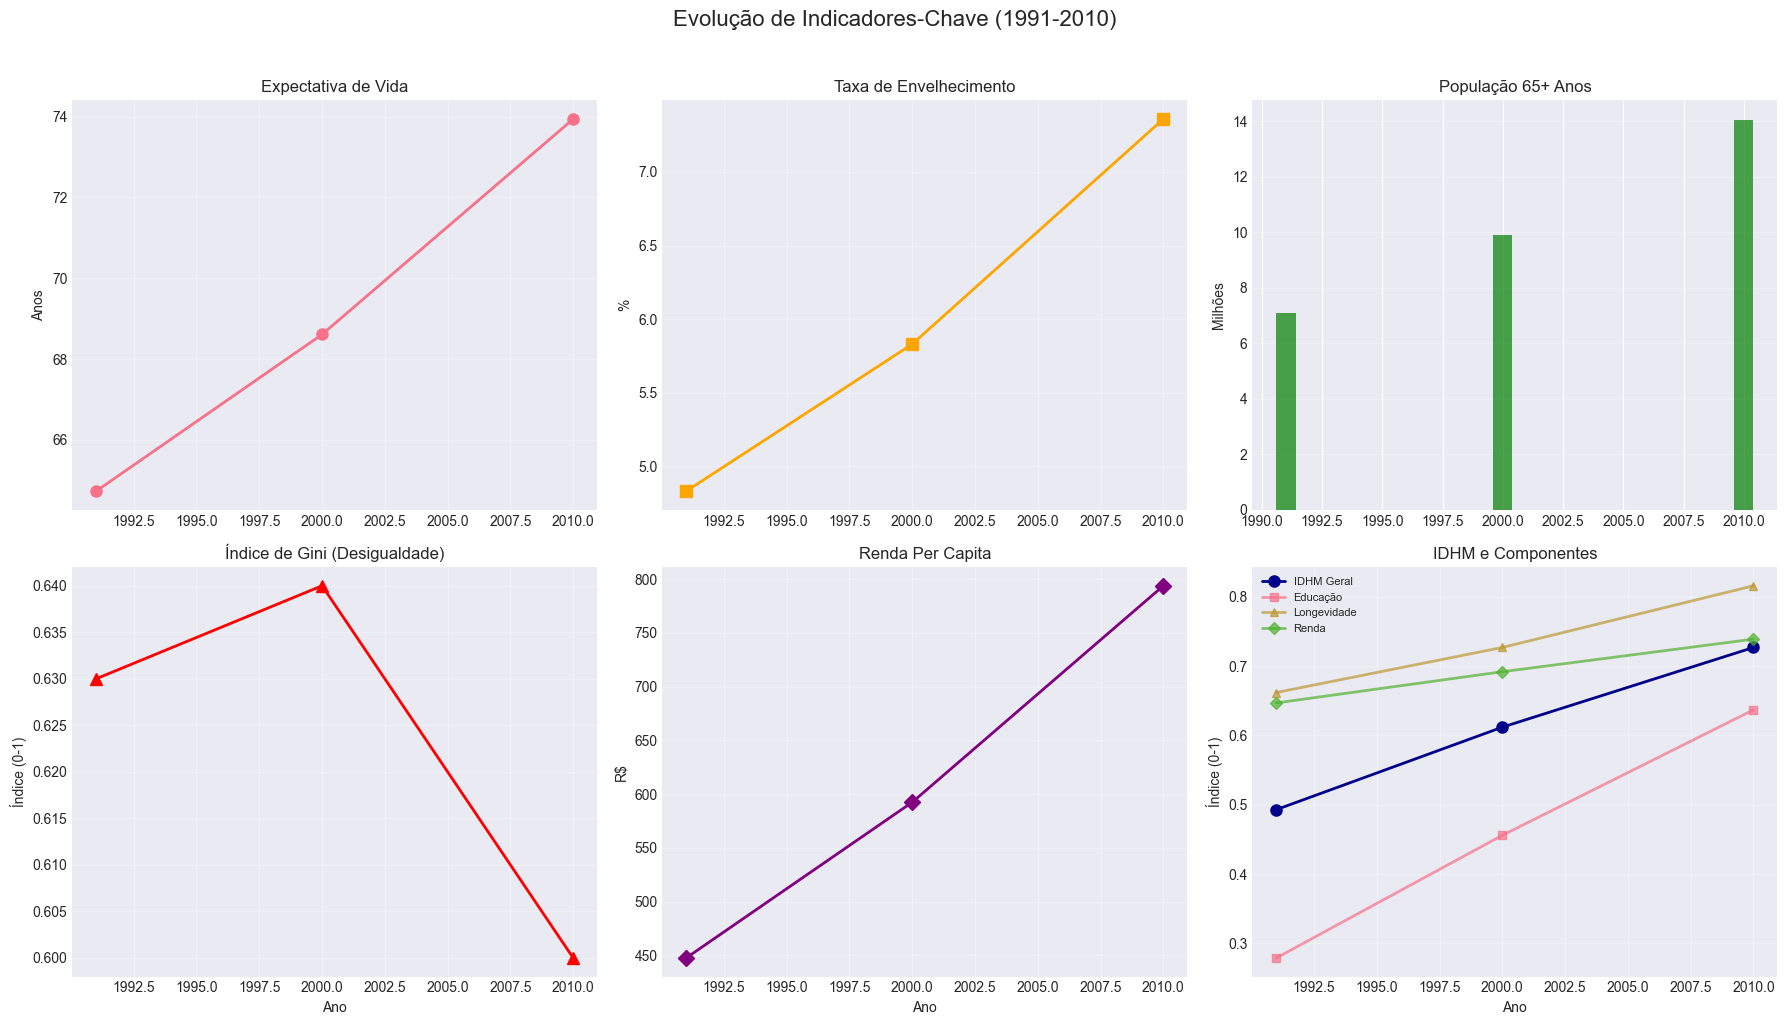

✓ Gráfico salvo em: c:\Users\cabra\Desktop\Projeto\reports\figures\01_evolucao_indicadores.png


In [4]:
# Criar figura com múltiplos subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Evolução de Indicadores-Chave (1991-2010)', fontsize=16, y=1.02)

# 1. Expectativa de Vida
ax1 = axes[0, 0]
ax1.plot(df_onu['ano'], df_onu['expectativa_vida'], marker='o', linewidth=2, markersize=8)
ax1.set_title('Expectativa de Vida')
ax1.set_ylabel('Anos')
ax1.grid(True, alpha=0.3)

# 2. Taxa de Envelhecimento
ax2 = axes[0, 1]
ax2.plot(df_onu['ano'], df_onu['taxa_envelhecimento'], marker='s', linewidth=2, markersize=8, color='orange')
ax2.set_title('Taxa de Envelhecimento')
ax2.set_ylabel('%')
ax2.grid(True, alpha=0.3)

# 3. População 65+
ax3 = axes[0, 2]
if 'populacao_65_mais' in df_onu.columns:
    ax3.bar(df_onu['ano'], df_onu['populacao_65_mais'] / 1e6, color='green', alpha=0.7)
    ax3.set_title('População 65+ Anos')
    ax3.set_ylabel('Milhões')
    ax3.grid(True, alpha=0.3, axis='y')

# 4. Índice de Gini
ax4 = axes[1, 0]
ax4.plot(df_onu['ano'], df_onu['indice_gini'], marker='^', linewidth=2, markersize=8, color='red')
ax4.set_title('Índice de Gini (Desigualdade)')
ax4.set_ylabel('Índice (0-1)')
ax4.set_xlabel('Ano')
ax4.grid(True, alpha=0.3)

# 5. Renda per capita
ax5 = axes[1, 1]
ax5.plot(df_onu['ano'], df_onu['renda_pc'], marker='D', linewidth=2, markersize=8, color='purple')
ax5.set_title('Renda Per Capita')
ax5.set_ylabel('R$')
ax5.set_xlabel('Ano')
ax5.grid(True, alpha=0.3)

# 6. IDHM
ax6 = axes[1, 2]
ax6.plot(df_onu['ano'], df_onu['idhm'], marker='o', linewidth=2, markersize=8, label='IDHM Geral', color='darkblue')
ax6.plot(df_onu['ano'], df_onu['idhm_e'], marker='s', linewidth=2, markersize=6, label='Educação', alpha=0.7)
ax6.plot(df_onu['ano'], df_onu['idhm_l'], marker='^', linewidth=2, markersize=6, label='Longevidade', alpha=0.7)
ax6.plot(df_onu['ano'], df_onu['idhm_r'], marker='D', linewidth=2, markersize=6, label='Renda', alpha=0.7)
ax6.set_title('IDHM e Componentes')
ax6.set_ylabel('Índice (0-1)')
ax6.set_xlabel('Ano')
ax6.legend(fontsize=8)
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(FIGURES_DIR / '01_evolucao_indicadores.png', dpi=300, bbox_inches='tight')
plt.show()

print("Gráfico salvo em:", FIGURES_DIR / '01_evolucao_indicadores.png')

## 5. Análise de Correlação - Envelhecimento e Desenvolvimento

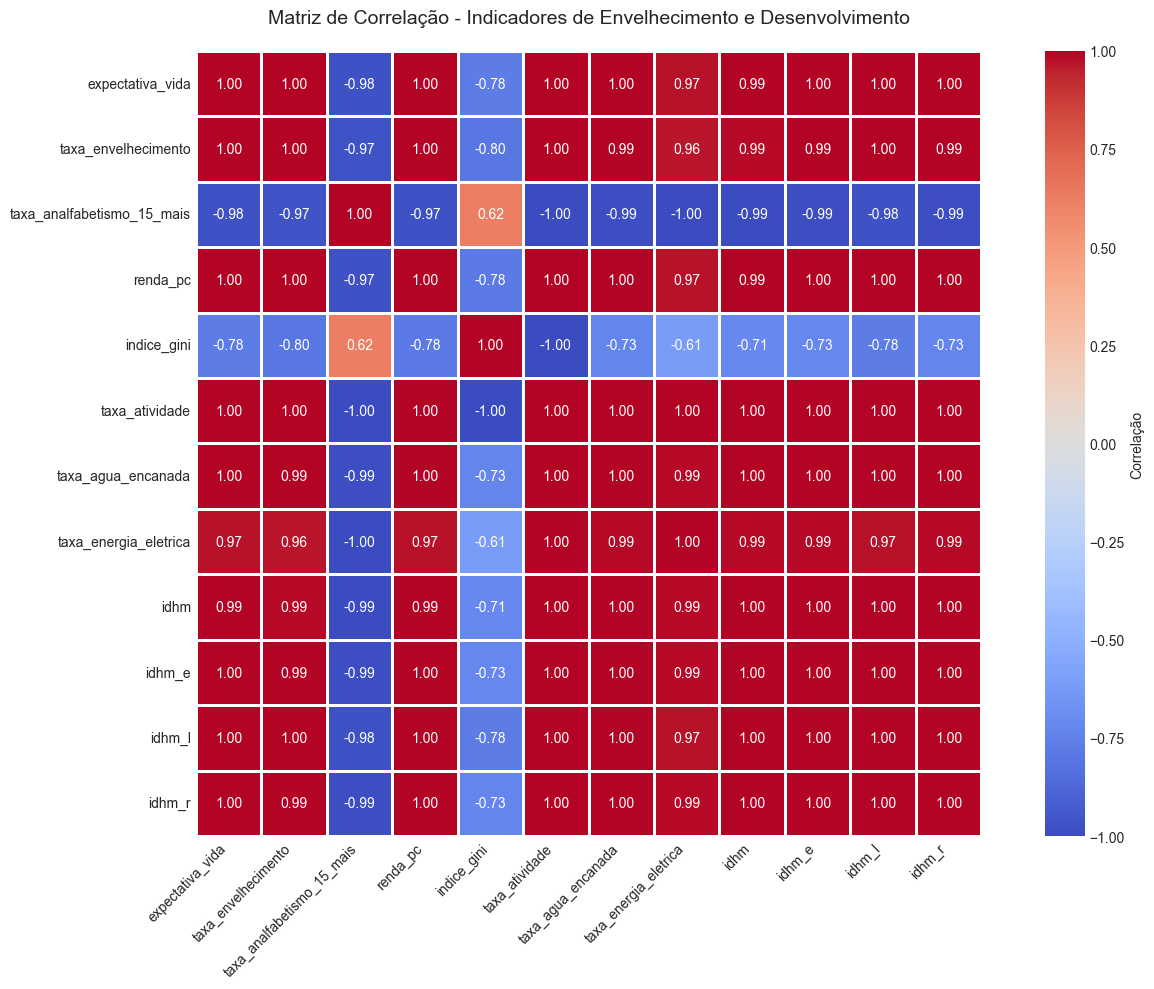


📊 TOP 5 Correlações Positivas:
1. expectativa_vida <-> taxa_atividade: 1.000
2. taxa_atividade <-> taxa_agua_encanada: 1.000
3. taxa_envelhecimento <-> taxa_atividade: 1.000
4. taxa_atividade <-> idhm_e: 1.000
5. taxa_atividade <-> taxa_energia_eletrica: 1.000

📊 TOP 5 Correlações Negativas:
1. taxa_analfabetismo_15_mais <-> idhm_e: -0.990
2. taxa_analfabetismo_15_mais <-> idhm: -0.992
3. taxa_analfabetismo_15_mais <-> taxa_energia_eletrica: -1.000
4. taxa_analfabetismo_15_mais <-> taxa_atividade: -1.000
5. indice_gini <-> taxa_atividade: -1.000


In [5]:
# Selecionar variáveis para matriz de correlação
vars_corr = [
    'expectativa_vida',
    'taxa_envelhecimento',
    'taxa_analfabetismo_15_mais',
    'renda_pc',
    'indice_gini',
    'taxa_atividade',
    'taxa_agua_encanada',
    'taxa_energia_eletrica',
    'idhm',
    'idhm_e',
    'idhm_l',
    'idhm_r'
]

# Filtrar apenas variáveis existentes
vars_existentes = [v for v in vars_corr if v in df_onu.columns]

# Calcular matriz de correlação
corr_matrix = df_onu[vars_existentes].corr()

# Criar heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={'label': 'Correlação'})
plt.title('Matriz de Correlação - Indicadores de Envelhecimento e Desenvolvimento', 
          fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig(FIGURES_DIR / '02_matriz_correlacao.png', dpi=300, bbox_inches='tight')
plt.show()

# Top 5 correlações positivas (excluindo diagonal)
corr_flat = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
corr_pairs = corr_flat.stack().sort_values(ascending=False)

print("\nTOP 5 Correlações Positivas:")
for i, (pair, value) in enumerate(corr_pairs.head(5).items(), 1):
    print(f"{i}. {pair[0]} <-> {pair[1]}: {value:.3f}")

print("\nTOP 5 Correlações Negativas:")
for i, (pair, value) in enumerate(corr_pairs.tail(5).items(), 1):
    print(f"{i}. {pair[0]} <-> {pair[1]}: {value:.3f}")

## 6. Análise Demográfica - Pirâmide Populacional Simplificada

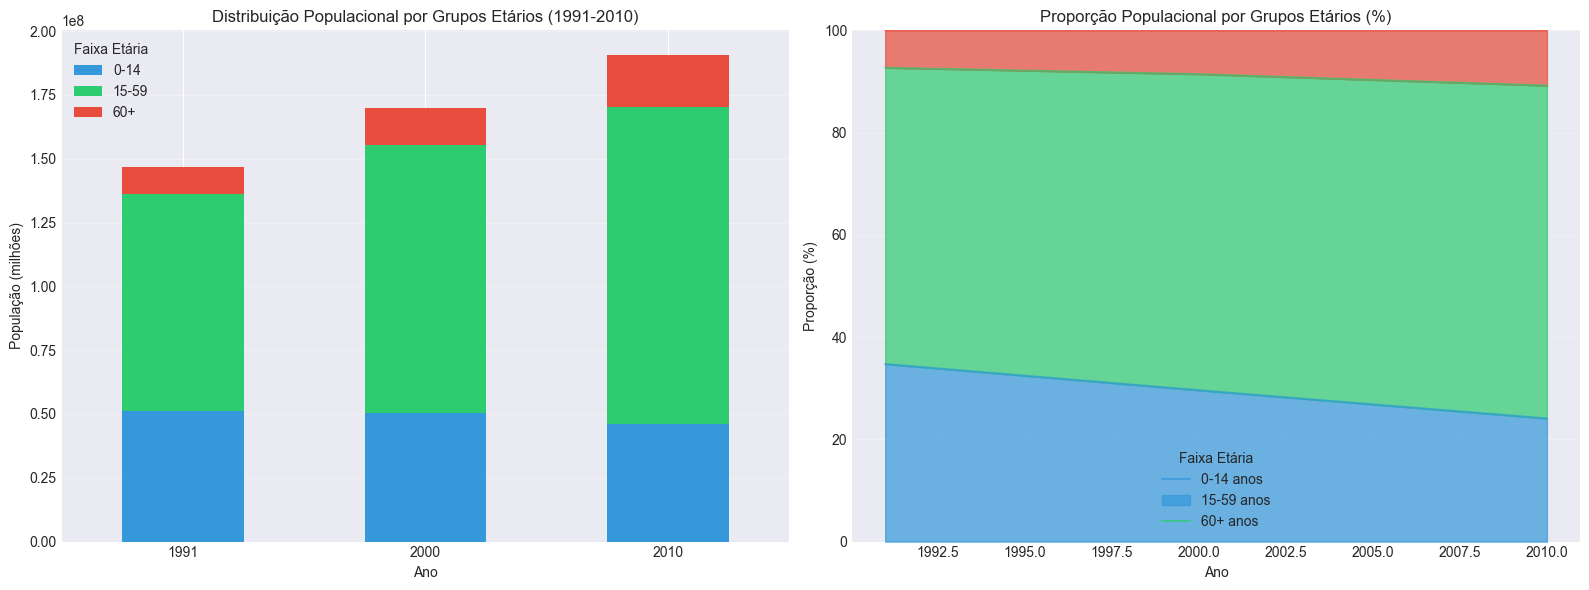


📊 Evolução da População 60+ (em milhões e %):
 ano      60+   60+_pct
1991 10722705  7.303028
2000 14536020  8.560728
2010 20590599 10.794219


In [6]:
# Calcular proporções por grupos etários nos 3 anos disponíveis
grupos_etarios = {
    '0-14': ['populacao_homens_0_4', 'populacao_homens_5_9', 'populacao_homens_10_14',
             'populacao_mulheres_0_4', 'populacao_mulheres_5_9', 'populacao_mulheres_10_14'],
    '15-59': ['populacao_homens_15_19', 'populacao_homens_20_24', 'populacao_homens_25_29',
              'populacao_homens_30_34', 'populacao_homens_35_39', 'populacao_homens_40_44',
              'populacao_homens_45_49', 'populacao_homens_50_54', 'populacao_homens_55_59',
              'populacao_mulheres_15_19', 'populacao_mulheres_20_24', 'populacao_mulheres_25_29',
              'populacao_mulheres_30_34', 'populacao_mulheres_35_39', 'populacao_mulheres_40_44',
              'populacao_mulheres_45_49', 'populacao_mulheres_50_54', 'populacao_mulheres_55_59'],
    '60+': ['populacao_homens_60_64', 'populacao_homens_65_69', 'populacao_homens_70_74',
            'populacao_homens_75_79', 'populacao_homens_80_mais',
            'populacao_mulheres_60_64', 'populacao_mulheres_65_69', 'populacao_mulheres_70_74',
            'populacao_mulheres_75_79', 'populacao_mulheres_80_mais']
}

# Calcular totais por grupo etário
resultados = []
for ano in df_onu['ano']:
    row = {'ano': ano}
    df_ano = df_onu[df_onu['ano'] == ano]
    
    for grupo, colunas in grupos_etarios.items():
        colunas_existentes = [c for c in colunas if c in df_onu.columns]
        total = df_ano[colunas_existentes].sum(axis=1).values[0] if colunas_existentes else 0
        row[grupo] = total
    
    row['total'] = sum([row[g] for g in grupos_etarios.keys()])
    resultados.append(row)

df_piramide = pd.DataFrame(resultados)

# Calcular proporções
for grupo in grupos_etarios.keys():
    df_piramide[f'{grupo}_pct'] = (df_piramide[grupo] / df_piramide['total']) * 100

# Visualizar evolução da estrutura etária
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras empilhadas
df_piramide.plot(x='ano', 
                 y=['0-14', '15-59', '60+'], 
                 kind='bar', 
                 stacked=True, 
                 ax=ax1,
                 color=['#3498db', '#2ecc71', '#e74c3c'])
ax1.set_title('Distribuição Populacional por Grupos Etários (1991-2010)', fontsize=12)
ax1.set_ylabel('População (milhões)')
ax1.set_xlabel('Ano')
ax1.legend(title='Faixa Etária')
ax1.grid(True, alpha=0.3, axis='y')
ax1.set_xticklabels(df_piramide['ano'], rotation=0)

# Gráfico de proporções
df_piramide.plot(x='ano', 
                 y=['0-14_pct', '15-59_pct', '60+_pct'], 
                 kind='area', 
                 stacked=True, 
                 ax=ax2,
                 color=['#3498db', '#2ecc71', '#e74c3c'],
                 alpha=0.7)
ax2.set_title('Proporção Populacional por Grupos Etários (%)', fontsize=12)
ax2.set_ylabel('Proporção (%)')
ax2.set_xlabel('Ano')
ax2.set_ylim(0, 100)
ax2.legend(['0-14 anos', '15-59 anos', '60+ anos'], title='Faixa Etária')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(FIGURES_DIR / '03_estrutura_etaria.png', dpi=300, bbox_inches='tight')
plt.show()

# Resumo numérico
print("\nEvolução da População 60+ (em milhões e %):")
print(df_piramide[['ano', '60+', '60+_pct']].to_string(index=False))

## 7. Síntese e Próximos Passos

In [7]:
# Criar resumo executivo dos achados
print("="*80)
print("RESUMO EXECUTIVO - ANÁLISE EXPLORATÓRIA")
print("="*80)

print("\n📈 TENDÊNCIAS OBSERVADAS (1991-2010):")
print(f"1. Expectativa de vida: {df_onu['expectativa_vida'].iloc[0]:.1f} → {df_onu['expectativa_vida'].iloc[-1]:.1f} anos (+{df_onu['expectativa_vida'].iloc[-1] - df_onu['expectativa_vida'].iloc[0]:.1f})")
print(f"2. Taxa de envelhecimento: {df_onu['taxa_envelhecimento'].iloc[0]:.2f}% → {df_onu['taxa_envelhecimento'].iloc[-1]:.2f}% (+{df_onu['taxa_envelhecimento'].iloc[-1] - df_onu['taxa_envelhecimento'].iloc[0]:.2f}pp)")
print(f"3. IDHM: {df_onu['idhm'].iloc[0]:.3f} → {df_onu['idhm'].iloc[-1]:.3f} (+{df_onu['idhm'].iloc[-1] - df_onu['idhm'].iloc[0]:.3f})")
print(f"4. Índice de Gini: {df_onu['indice_gini'].iloc[0]:.3f} → {df_onu['indice_gini'].iloc[-1]:.3f} ({df_onu['indice_gini'].iloc[-1] - df_onu['indice_gini'].iloc[0]:+.3f})")
print(f"5. Renda per capita: R$ {df_onu['renda_pc'].iloc[0]:.2f} → R$ {df_onu['renda_pc'].iloc[-1]:.2f} (+{((df_onu['renda_pc'].iloc[-1] / df_onu['renda_pc'].iloc[0]) - 1) * 100:.1f}%)")

print("\n🎯 PRINCIPAIS ACHADOS:")
print("• O Brasil está em processo de envelhecimento acelerado")
print("• Houve melhora significativa nos indicadores de desenvolvimento humano")
print("• A desigualdade (Gini) reduziu levemente, mas ainda é alta")
print("• A expectativa de vida cresceu ~9 anos em 20 anos")
print("• A população 60+ está crescendo em proporção e números absolutos")

print("\n📋 PRÓXIMOS PASSOS:")
print("1. Integrar dados IBGE sobre uso de internet por idosos")
print("2. Integrar dados ITU para comparação internacional")
print("3. Análise de estratificação (renda, educação, raça/cor)")
print("4. Regressão: determinantes do envelhecimento ativo")
print("5. Cluster: perfis de envelhecimento digital")
print("6. Gap analysis: Brasil vs. países desenvolvidos")

print("\n✅ Análise exploratória concluída!")
print(f"📁 Figuras salvas em: {FIGURES_DIR}")
print("="*80)

RESUMO EXECUTIVO - ANÁLISE EXPLORATÓRIA

📈 TENDÊNCIAS OBSERVADAS (1991-2010):
1. Expectativa de vida: 64.7 → 73.9 anos (+9.2)
2. Taxa de envelhecimento: 4.83% → 7.36% (+2.53pp)
3. IDHM: 0.493 → 0.727 (+0.234)
4. Índice de Gini: 0.630 → 0.600 (-0.030)
5. Renda per capita: R$ 447.56 → R$ 793.87 (+77.4%)

🎯 PRINCIPAIS ACHADOS:
• O Brasil está em processo de envelhecimento acelerado
• Houve melhora significativa nos indicadores de desenvolvimento humano
• A desigualdade (Gini) reduziu levemente, mas ainda é alta
• A expectativa de vida cresceu ~9 anos em 20 anos
• A população 60+ está crescendo em proporção e números absolutos

📋 PRÓXIMOS PASSOS:
1. Integrar dados IBGE sobre uso de internet por idosos
2. Integrar dados ITU para comparação internacional
3. Análise de estratificação (renda, educação, raça/cor)
4. Regressão: determinantes do envelhecimento ativo
5. Cluster: perfis de envelhecimento digital
6. Gap analysis: Brasil vs. países desenvolvidos

✅ Análise exploratória concluída!
📁 F